In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def generate_test_data(N, p):
    features = pd.DataFrame([np.random.randn(p) for x in range(N)])

    b = np.random.normal(size = p)

    e = np.random.randn() 
    Y = features.apply(lambda row: sum(row * b) + e, axis = 1)

    features['Y'] = Y

    return (b, features)

In [23]:
def compare_p_n():
    for p in [20, 100, 1000]:
        for l in [0.0001, 0.01, 10, 100, 1000]:
            N = 100

            mse = 0
            X = 100
            coeff_error = 0
            
            for x in range(X):
                b, data = generate_test_data(N, p)

                train, test = train_test_split(data, train_size = 0.7)

                #params = {'alpha': np.logspace(-10, 10, 50)}
                #params = {'alpha': [0.001, 100, 1000]}
                model = Ridge()
                #estimator = GridSearchCV(model, params)
                estimator = Ridge(alpha = l)
                estimator.fit(train.drop('Y', axis = 1), train['Y']) 
                                
                y_pred = estimator.predict(test.drop('Y', axis = 1))
                y_true = test['Y']
                
                coeff_error += mean_squared_error(b, estimator.coef_)
                
                mse += mean_squared_error(y_true, y_pred)
            print "for N = {}, p = {}, alpha = {}, mean mse = {}, ce = {}".format(N, p, l, mse / X, coeff_error / X)
                
                #print "for N = {}, p = {}, alpha = {} and mse = {}".format(N, 
                #                                                           p, 
                #                                                           l, #estimator.best_params_['alpha'], 
                #                                                           mean_squared_error(y_true, y_pred))





In [24]:
#for x in range(20):
compare_p_n()

for N = 100, p = 20, alpha = 0.0001, mean mse = 1.42226720669e-10, ce = 6.9243622229e-12
for N = 100, p = 20, alpha = 0.01, mean mse = 1.32620702347e-06, ce = 6.33160628738e-08
for N = 100, p = 20, alpha = 10, mean mse = 0.639671871304, ce = 0.0328951666518
for N = 100, p = 20, alpha = 100, mean mse = 8.1270047142, ce = 0.39723064091
for N = 100, p = 20, alpha = 1000, mean mse = 17.3740591588, ce = 0.885904032807
for N = 100, p = 100, alpha = 0.0001, mean mse = 33.4441968838, ce = 0.315472806784
for N = 100, p = 100, alpha = 0.01, mean mse = 31.768745956, ce = 0.305049476909
for N = 100, p = 100, alpha = 10, mean mse = 36.3359518968, ce = 0.353743286317
for N = 100, p = 100, alpha = 100, mean mse = 61.2073115938, ce = 0.587860311201
for N = 100, p = 100, alpha = 1000, mean mse = 90.9156984873, ce = 0.884865211404
for N = 100, p = 1000, alpha = 0.0001, mean mse = 947.727351903, ce = 0.938028958037
for N = 100, p = 1000, alpha = 0.01, mean mse = 931.557127732, ce = 0.927202519483
for N =

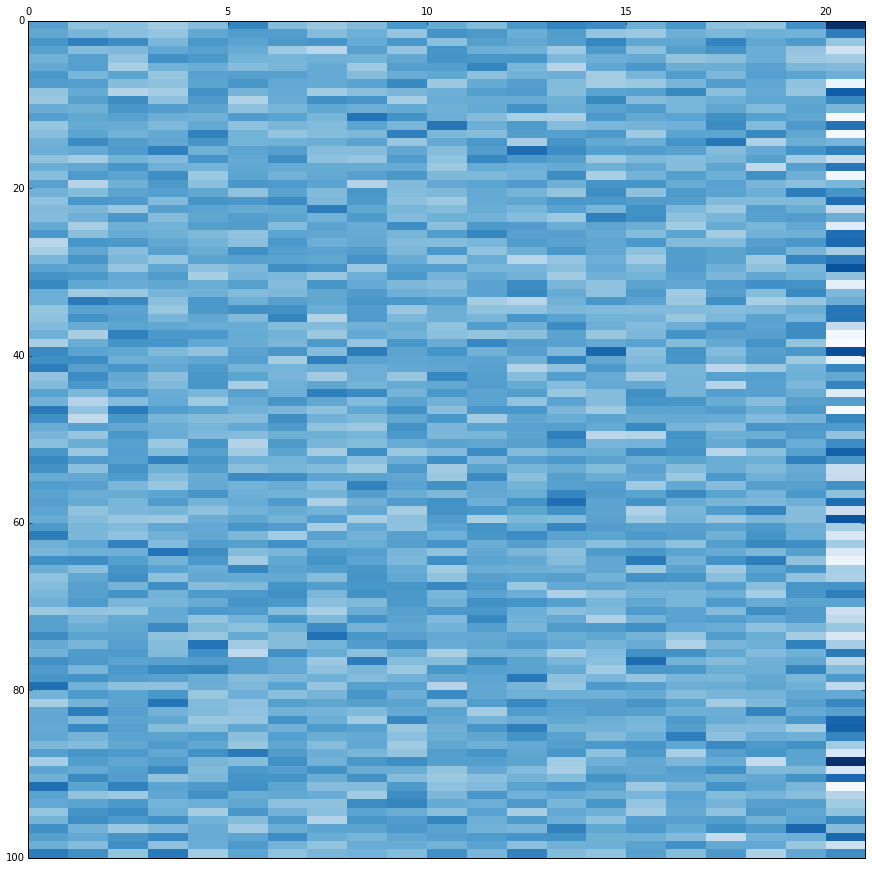

In [224]:
data = generate_test_data(100, 20)

plt.rcParams["figure.figsize"] = [15, 15]
fig, ax = plt.subplots()
heatmap = ax.pcolor(data, cmap=plt.cm.Blues)
ax.invert_yaxis()
ax.xaxis.tick_top()

plt.xlim(0, 21)

plt.show()


In [22]:
np.logspace(-10, -2, 200)

array([  1.00000000e-10,   1.09698580e-10,   1.20337784e-10,
         1.32008840e-10,   1.44811823e-10,   1.58856513e-10,
         1.74263339e-10,   1.91164408e-10,   2.09704640e-10,
         2.30043012e-10,   2.52353917e-10,   2.76828663e-10,
         3.03677112e-10,   3.33129479e-10,   3.65438307e-10,
         4.00880633e-10,   4.39760361e-10,   4.82410870e-10,
         5.29197874e-10,   5.80522552e-10,   6.36824994e-10,
         6.98587975e-10,   7.66341087e-10,   8.40665289e-10,
         9.22197882e-10,   1.01163798e-09,   1.10975250e-09,
         1.21738273e-09,   1.33545156e-09,   1.46497140e-09,
         1.60705282e-09,   1.76291412e-09,   1.93389175e-09,
         2.12145178e-09,   2.32720248e-09,   2.55290807e-09,
         2.80050389e-09,   3.07211300e-09,   3.37006433e-09,
         3.69691271e-09,   4.05546074e-09,   4.44878283e-09,
         4.88025158e-09,   5.35356668e-09,   5.87278661e-09,
         6.44236351e-09,   7.06718127e-09,   7.75259749e-09,
         8.50448934e-09,